## Biblioteca importadas

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [2]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [3]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [4]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [5]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [6]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [7]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [8]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [9]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)

#### Inflação do turismo no Brasil

In [10]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)

#### PIB do Brasil e dos Estados dos aeroportos 

In [11]:
filename = r'C:Dados macros\pib_real.xlsx'
pib = pd.read_excel(filename)

## Analise exploratoria

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [12]:
principal =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

principal.head()

,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR,PIB REAL MA,PIB REAL SC,PIB REAL TO
0,2000,2981167,0.072882,329,27.60,1.9678,7.04,5.051888e+12,1.839688e+12,3.128403e+11,5.645866e+10,1.931659e+11,1.887118e+10
1,2001,3198439,0.207066,581,23.12,2.3840,6.84,5.122104e+12,1.839688e+12,3.128403e+11,5.645866e+10,1.931659e+11,1.887118e+10
2,2002,3860727,-0.140686,20,24.36,3.7342,8.45,5.278505e+12,1.839688e+12,3.128403e+11,5.645866e+10,1.931659e+11,1.887118e+10
3,2003,3317577,0.007247,29211,28.10,2.9293,14.71,5.338724e+12,1.838010e+12,3.419598e+11,6.060745e+10,1.991932e+11,2.054859e+10
4,2004,3341621,0.228481,54979,36.05,2.7508,6.60,5.646232e+12,1.883150e+12,3.560391e+11,6.381553e+10,2.123200e+11,2.091384e+10


#### Correlação entre os dados pré selecionados 

In [13]:
principal = principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR
Ano,1.000000,0.825633,-0.502786,0.537493,0.498046,0.462911,-0.379601,0.934155,0.898730,0.963626
Passageiros,0.825633,1.000000,-0.334966,0.747097,0.757172,0.089808,-0.283610,0.954258,0.963111,0.898470
Passageiros_freq,-0.502786,-0.334966,1.000000,-0.089302,-0.053763,-0.623398,0.044637,-0.371868,-0.327455,-0.417270
Passageiros internacionais,0.537493,0.747097,-0.089302,1.000000,0.769081,-0.233850,-0.354779,0.718224,0.747865,0.591033
Oil,0.498046,0.757172,-0.053763,0.769081,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.617865
dolar,0.462911,0.089808,-0.623398,-0.233850,-0.336762,1.000000,0.166638,0.202944,0.108461,0.341305
inflacao,-0.379601,-0.283610,0.044637,-0.354779,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.311484
PIB REAL BRASIL,0.934155,0.954258,-0.371868,0.718224,0.739618,0.202944,-0.388362,1.000000,0.991895,0.975378
PIB REAL SP,0.898730,0.963111,-0.327455,0.747865,0.768696,0.108461,-0.408767,0.991895,1.000000,0.951621
PIB REAL PR,0.963626,0.898470,-0.417270,0.591033,0.617865,0.341305,-0.311484,0.975378,0.951621,1.000000


#### Análise grafica

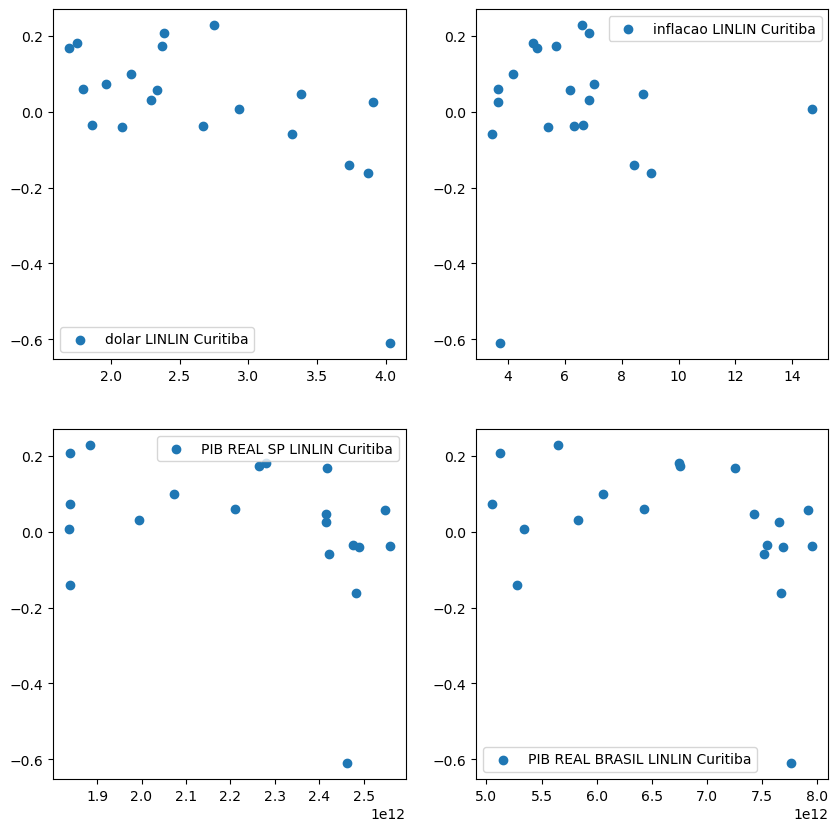

C:\Users\guido\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


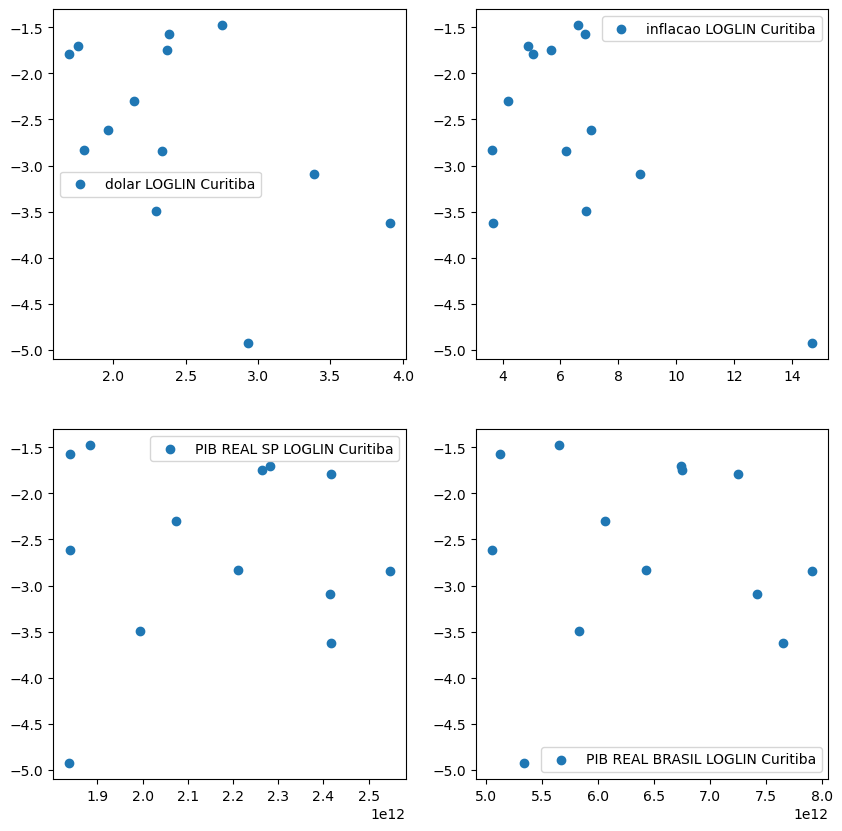

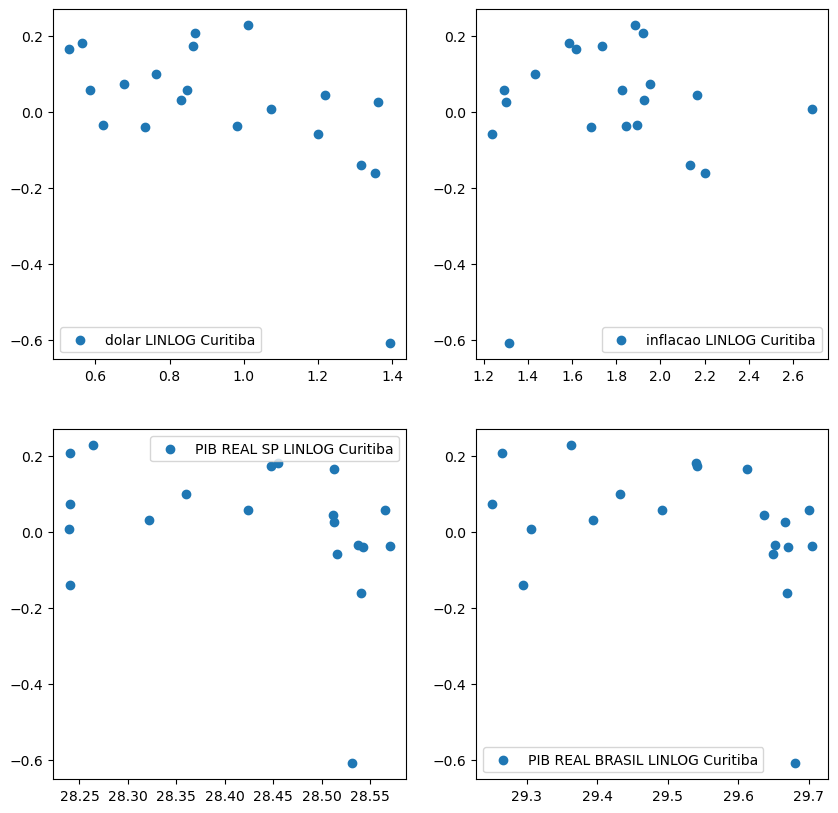

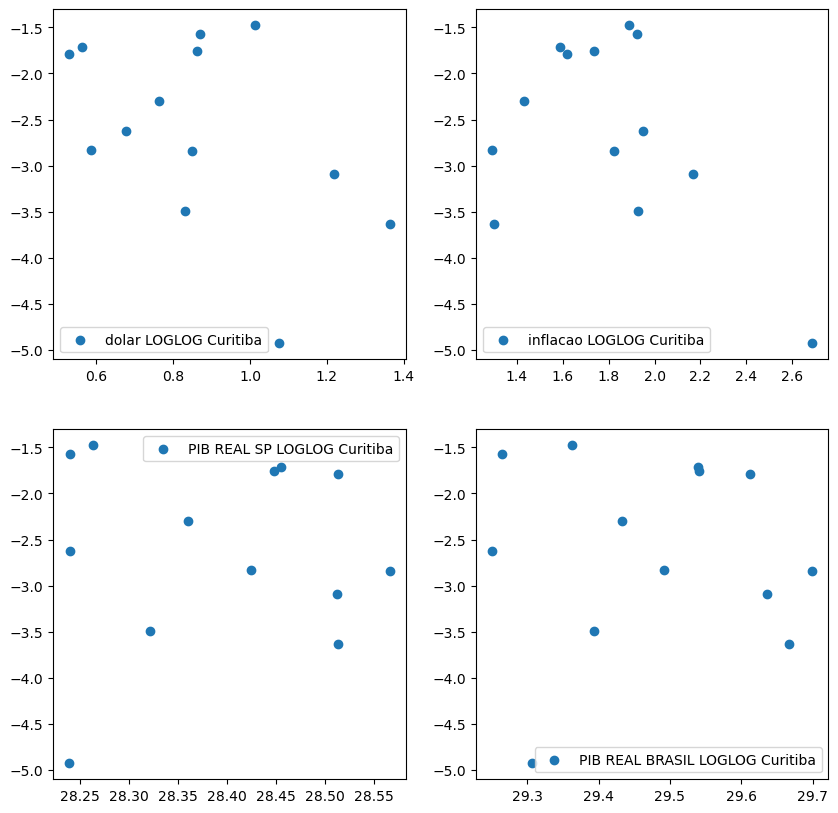

In [14]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros_freq"], label='dolar LINLIN Curitiba')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros_freq"], label = 'inflacao LINLIN Curitiba' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros_freq"], label = 'PIB REAL SP LINLIN Curitiba' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros_freq"], label='PIB REAL BRASIL LINLIN Curitiba')
ax[1,1].legend()

plt.show()
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros_freq"]), label='dolar LOGLIN Curitiba')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLIN Curitiba' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLIN Curitiba' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLIN Curitiba')
ax[1,1].legend()

plt.show()
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros_freq"], label='dolar LINLOG Curitiba')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros_freq"], label = 'inflacao LINLOG Curitiba' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros_freq"], label = 'PIB REAL SP LINLOG Curitiba' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros_freq"], label='PIB REAL BRASIL LINLOG Curitiba')
ax[1,1].legend()

plt.show()
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros_freq"]), label='dolar LOGLOG Curitiba')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLOG Curitiba' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLOG Curitiba' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLOG Curitiba')
ax[1,1].legend()

plt.show()

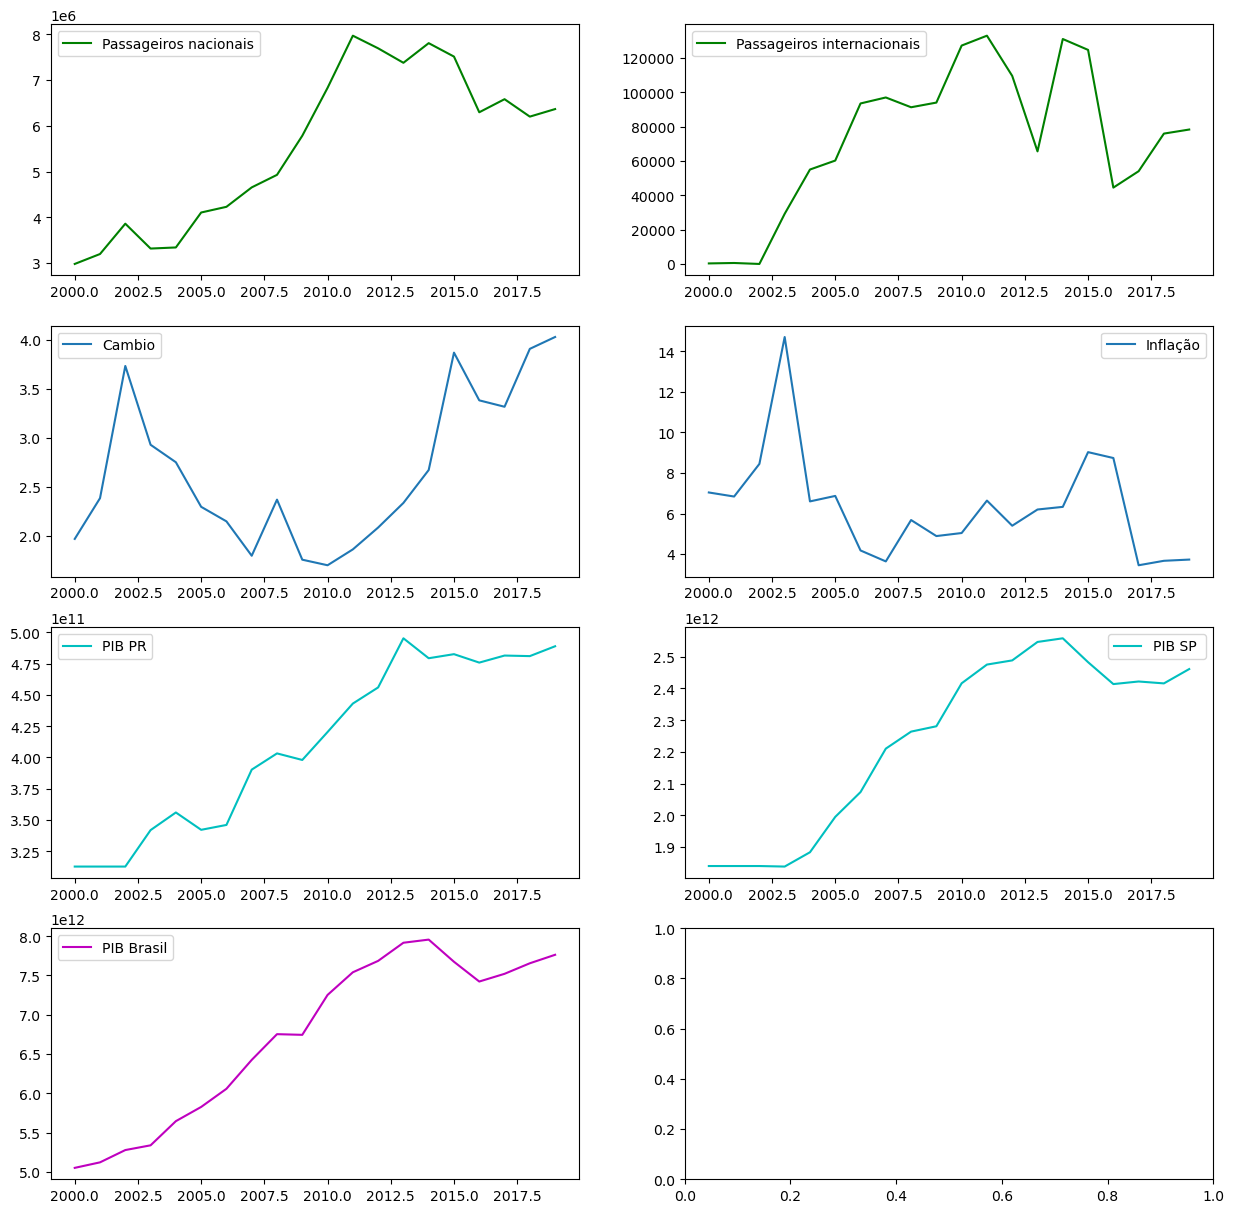

In [15]:

fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()


plt.show()

## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [16]:
principal =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [17]:
principal= principal.loc[principal["Ano"]<2020]

principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR
Ano,1.000000,0.965459,-0.286327,0.856124,0.498046,0.462911,-0.379601,0.934155,0.898730,0.963626
Passageiros,0.965459,1.000000,-0.389858,0.927720,0.477749,0.490011,-0.329348,0.906031,0.866309,0.940676
Passageiros_freq,-0.286327,-0.389858,1.000000,-0.356463,-0.050288,-0.405668,0.225155,-0.169842,-0.149079,-0.200272
Passageiros internacionais,0.856124,0.927720,-0.356463,1.000000,0.386478,0.556759,-0.238665,0.776142,0.713907,0.825925
Oil,0.498046,0.477749,-0.050288,0.386478,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.617865
dolar,0.462911,0.490011,-0.405668,0.556759,-0.336762,1.000000,0.166638,0.202944,0.108461,0.341305
inflacao,-0.379601,-0.329348,0.225155,-0.238665,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.311484
PIB REAL BRASIL,0.934155,0.906031,-0.169842,0.776142,0.739618,0.202944,-0.388362,1.000000,0.991895,0.975378
PIB REAL SP,0.898730,0.866309,-0.149079,0.713907,0.768696,0.108461,-0.408767,0.991895,1.000000,0.951621
PIB REAL PR,0.963626,0.940676,-0.200272,0.825925,0.617865,0.341305,-0.311484,0.975378,0.951621,1.000000


##### Análise grafica

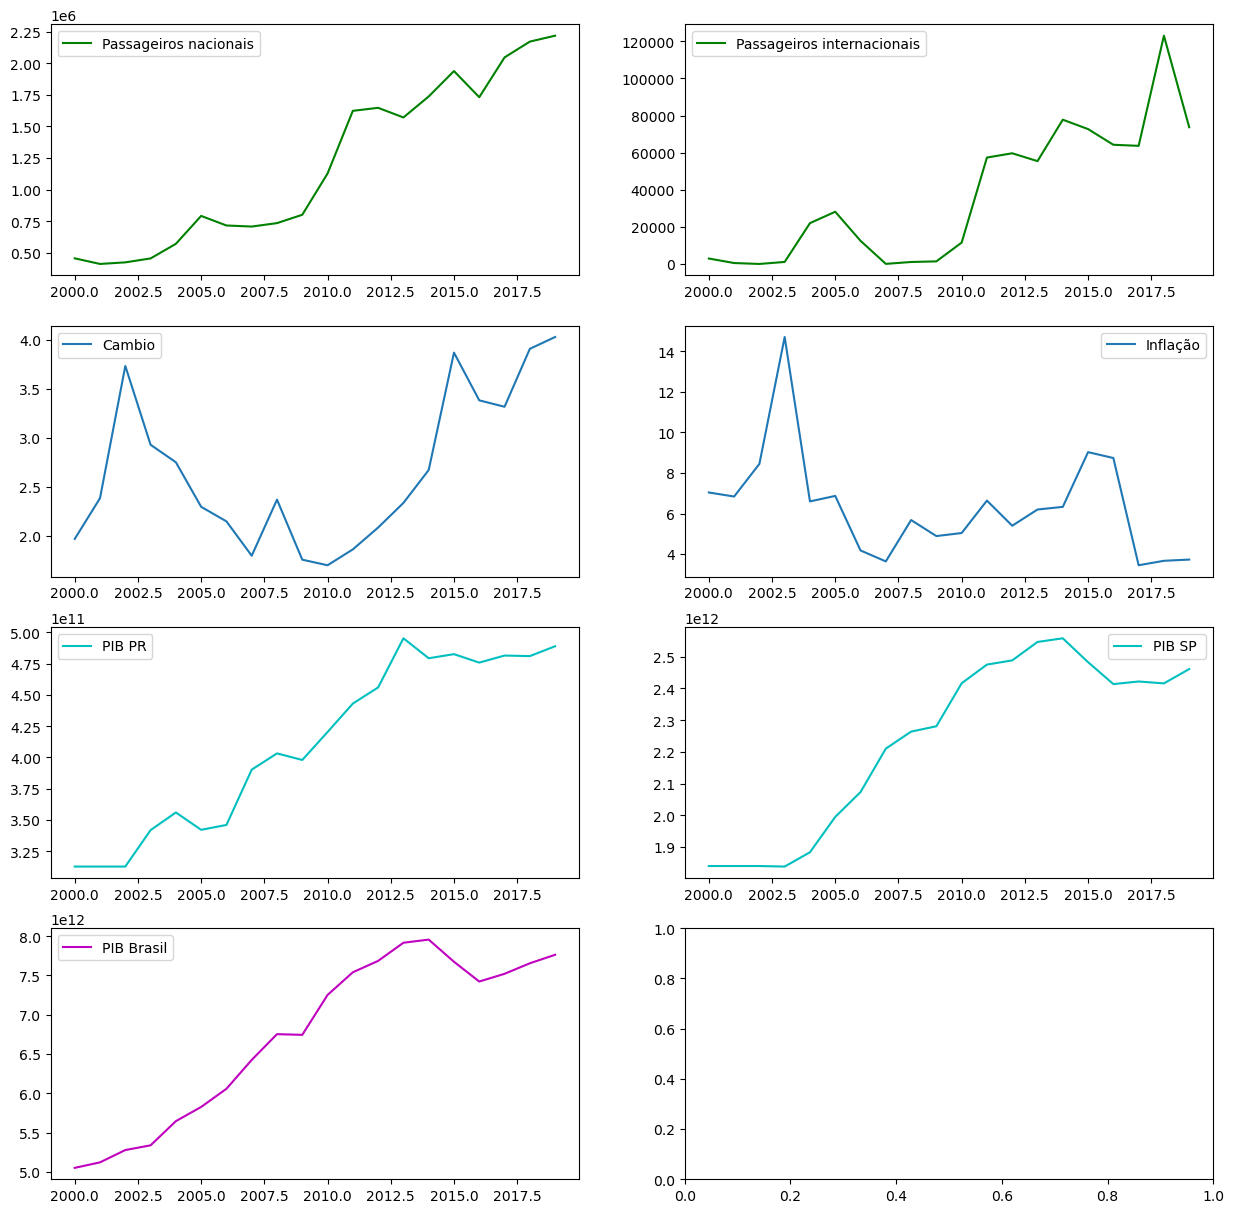

In [18]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()


plt.show()

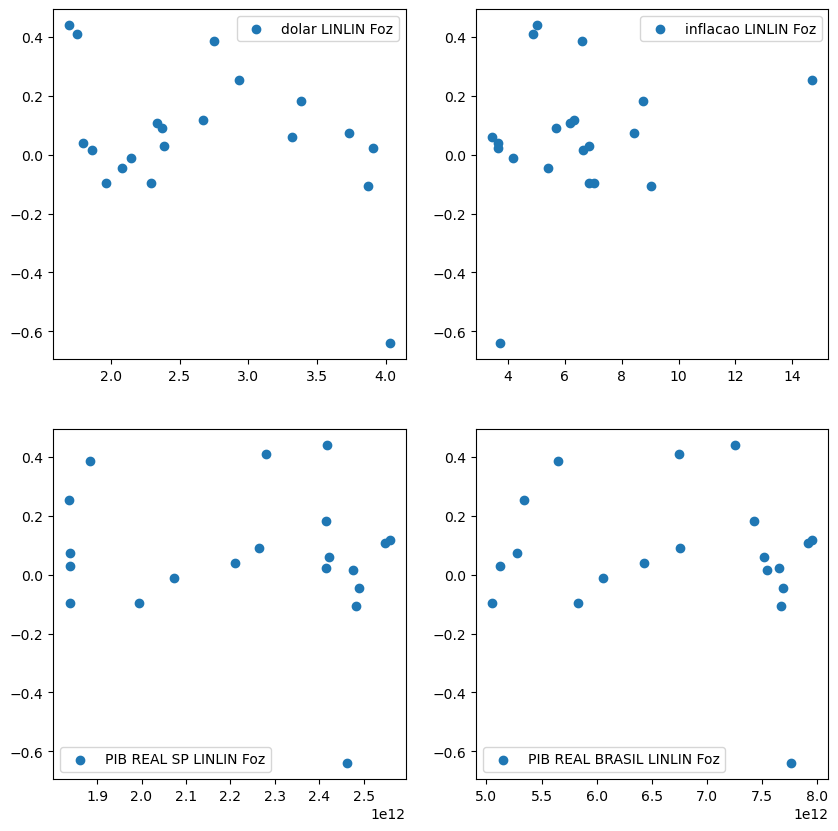

C:\Users\guido\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


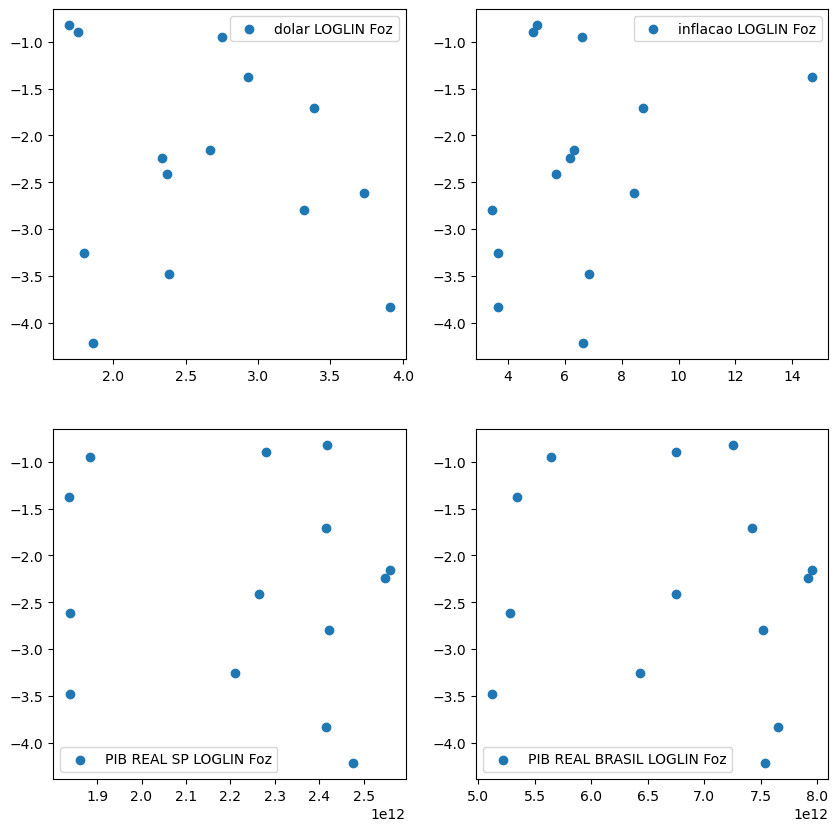

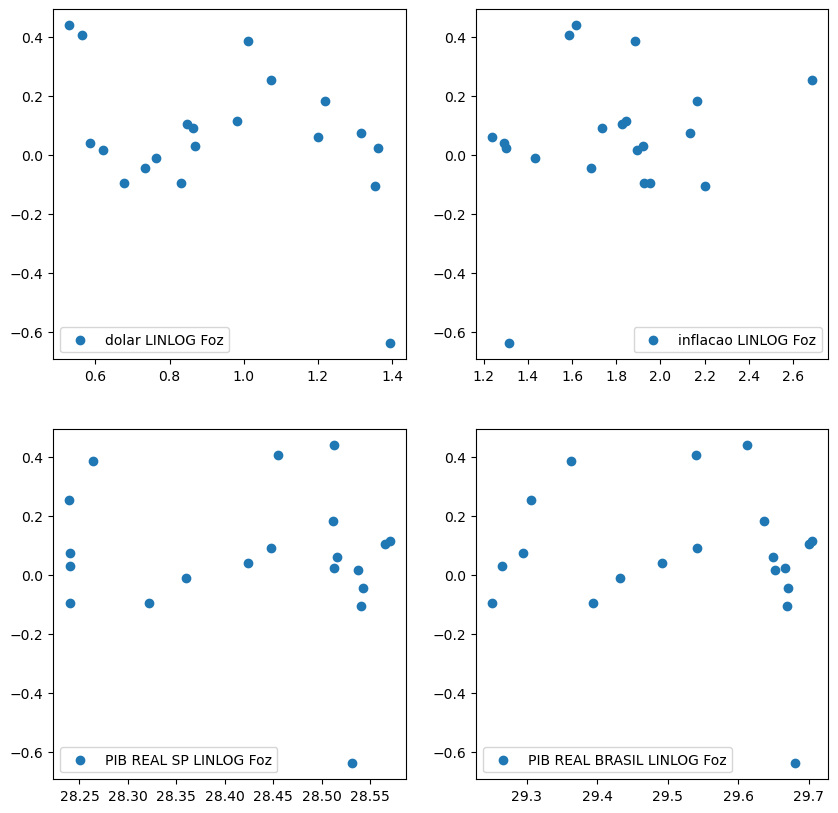

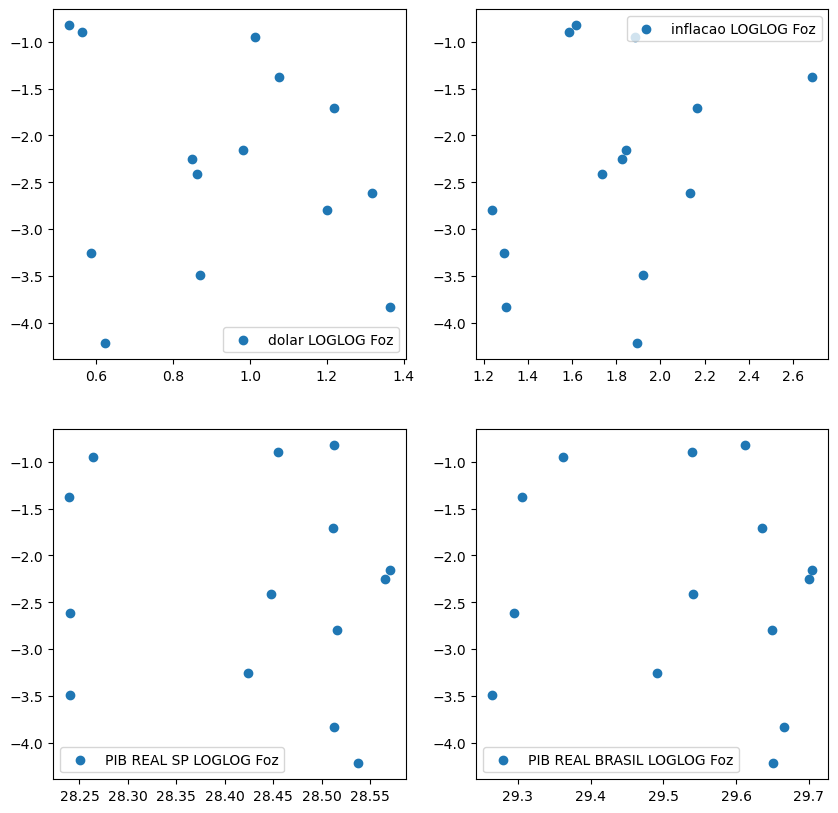

In [19]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros_freq"], label='dolar LINLIN Foz')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros_freq"], label = 'inflacao LINLIN Foz' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros_freq"], label = 'PIB REAL SP LINLIN Foz' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros_freq"], label='PIB REAL BRASIL LINLIN Foz')
ax[1,1].legend()

plt.show()
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros_freq"]), label='dolar LOGLIN Foz')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLIN Foz' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLIN Foz' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLIN Foz')
ax[1,1].legend()

plt.show()
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros_freq"], label='dolar LINLOG Foz')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros_freq"], label = 'inflacao LINLOG Foz' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros_freq"], label = 'PIB REAL SP LINLOG Foz' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros_freq"], label='PIB REAL BRASIL LINLOG Foz')
ax[1,1].legend()

plt.show()
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros_freq"]), label='dolar LOGLOG Foz')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLOG Foz' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLOG Foz' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLOG Foz')
ax[1,1].legend()

plt.show()

## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [20]:
principal =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [21]:
principal= principal.loc[principal["Ano"]<2020]

principal.drop(["PIB REAL MA", "PIB REAL PR","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros_freq,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL SC
Ano,1.000000,0.874199,0.244363,0.440303,0.498046,0.462911,-0.379601,0.934155,0.898730,0.964981
Passageiros,0.874199,1.000000,-0.102720,0.499191,0.326950,0.522662,-0.296078,0.786511,0.749122,0.854746
Passageiros_freq,0.244363,-0.102720,1.000000,-0.062396,0.354991,-0.179662,-0.099098,0.313253,0.313613,0.270017
Passageiros internacionais,0.440303,0.499191,-0.062396,1.000000,0.046403,0.482121,-0.332472,0.259354,0.193522,0.331311
Oil,0.498046,0.326950,0.354991,0.046403,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.663694
dolar,0.462911,0.522662,-0.179662,0.482121,-0.336762,1.000000,0.166638,0.202944,0.108461,0.304972
inflacao,-0.379601,-0.296078,-0.099098,-0.332472,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.389976
PIB REAL BRASIL,0.934155,0.786511,0.313253,0.259354,0.739618,0.202944,-0.388362,1.000000,0.991895,0.988461
PIB REAL SP,0.898730,0.749122,0.313613,0.193522,0.768696,0.108461,-0.408767,0.991895,1.000000,0.971014
PIB REAL SC,0.964981,0.854746,0.270017,0.331311,0.663694,0.304972,-0.389976,0.988461,0.971014,1.000000


##### Análise grafica

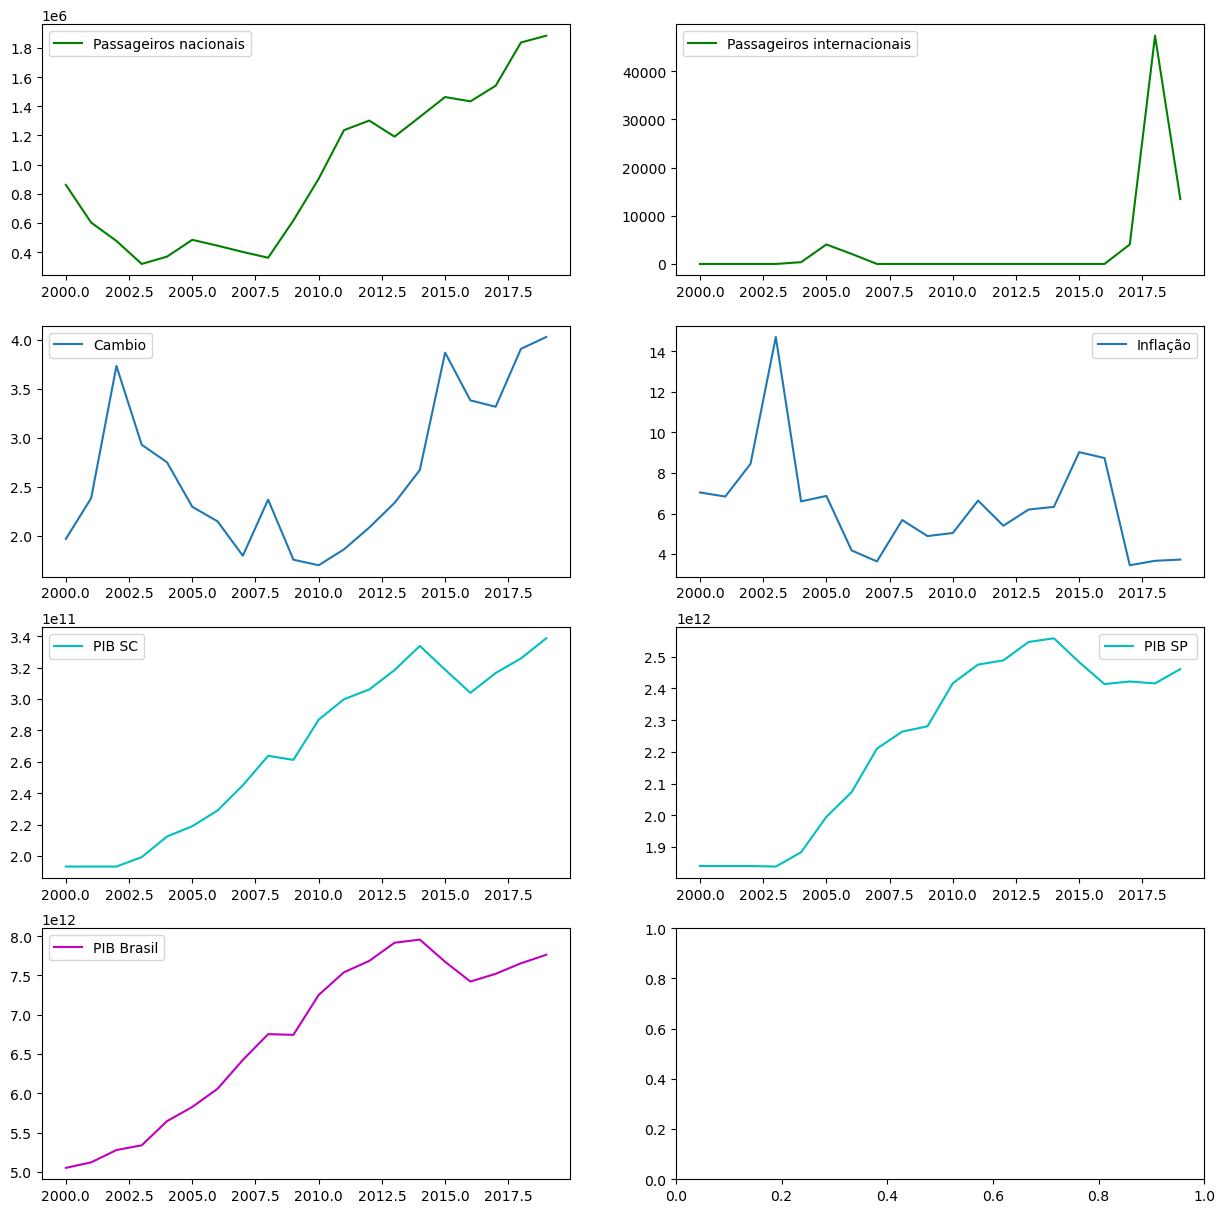

In [22]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()


plt.show()

KeyError: 'Passageiros_freq'

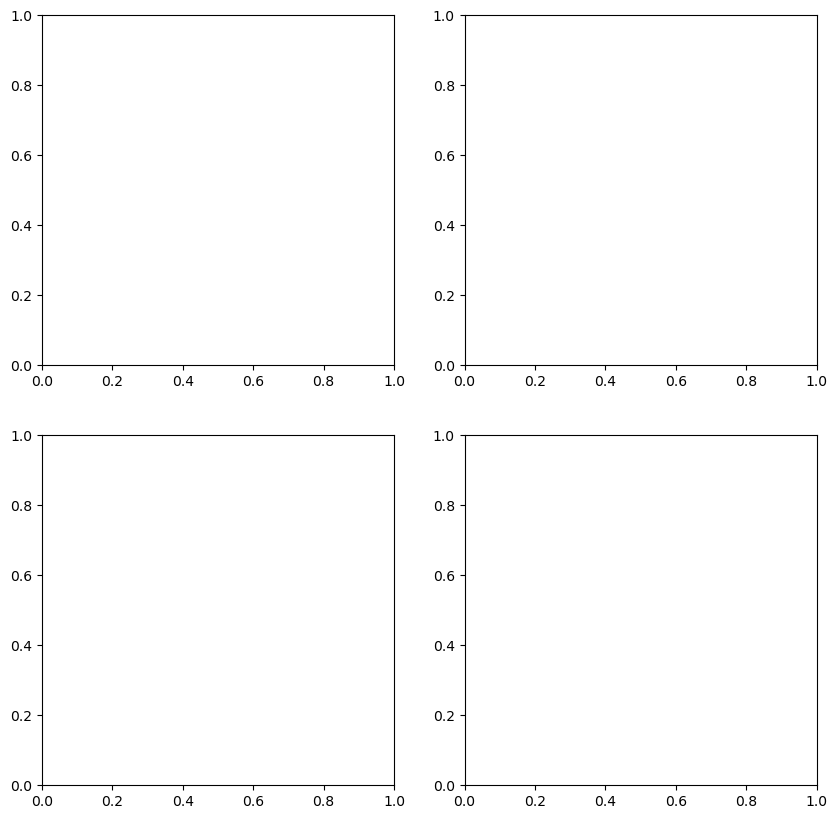

In [24]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros_freq"], label='dolar LINLIN Navegantes')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros_freq"], label = 'inflacao LINLIN Navegantes' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros_freq"], label = 'PIB REAL SP LINLIN Navegantes' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros_freq"], label='PIB REAL BRASIL LINLIN Navegantes')
ax[1,1].legend()

plt.show()
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros_freq"]), label='dolar LOGLIN Navegantes')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLIN Navegantes' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLIN Navegantes' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLIN Navegantes')
ax[1,1].legend()

plt.show()
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros_freq"], label='dolar LINLOG Navegantes')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros_freq"], label = 'inflacao LINLOG Navegantes' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros_freq"], label = 'PIB REAL SP LINLOG Navegantes' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros_freq"], label='PIB REAL BRASIL LINLOG Navegantes')
ax[1,1].legend()

plt.show()
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros_freq"]), label='dolar LOGLOG Navegantes')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLOG Navegantes' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLOG Navegantes' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLOG Navegantes')
ax[1,1].legend()

plt.show()

## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [25]:
principal =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [26]:
principal= principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL PR"],axis=1).corr()

,Ano,Passageiros,Passageiros_freq,Oil,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL TO
Ano,1.000000,0.942935,-0.249136,0.498046,0.462911,-0.379601,0.934155,0.898730,0.986580
Passageiros,0.942935,1.000000,-0.337393,0.546518,0.365772,-0.344995,0.937534,0.915110,0.963334
Passageiros_freq,-0.249136,-0.337393,1.000000,-0.229596,0.019682,0.743224,-0.284020,-0.312353,-0.243176
Oil,0.498046,0.546518,-0.229596,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.506281
dolar,0.462911,0.365772,0.019682,-0.336762,1.000000,0.166638,0.202944,0.108461,0.443775
inflacao,-0.379601,-0.344995,0.743224,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.331505
PIB REAL BRASIL,0.934155,0.937534,-0.284020,0.739618,0.202944,-0.388362,1.000000,0.991895,0.943447
PIB REAL SP,0.898730,0.915110,-0.312353,0.768696,0.108461,-0.408767,0.991895,1.000000,0.913279
PIB REAL TO,0.986580,0.963334,-0.243176,0.506281,0.443775,-0.331505,0.943447,0.913279,1.000000


##### Análise grafica

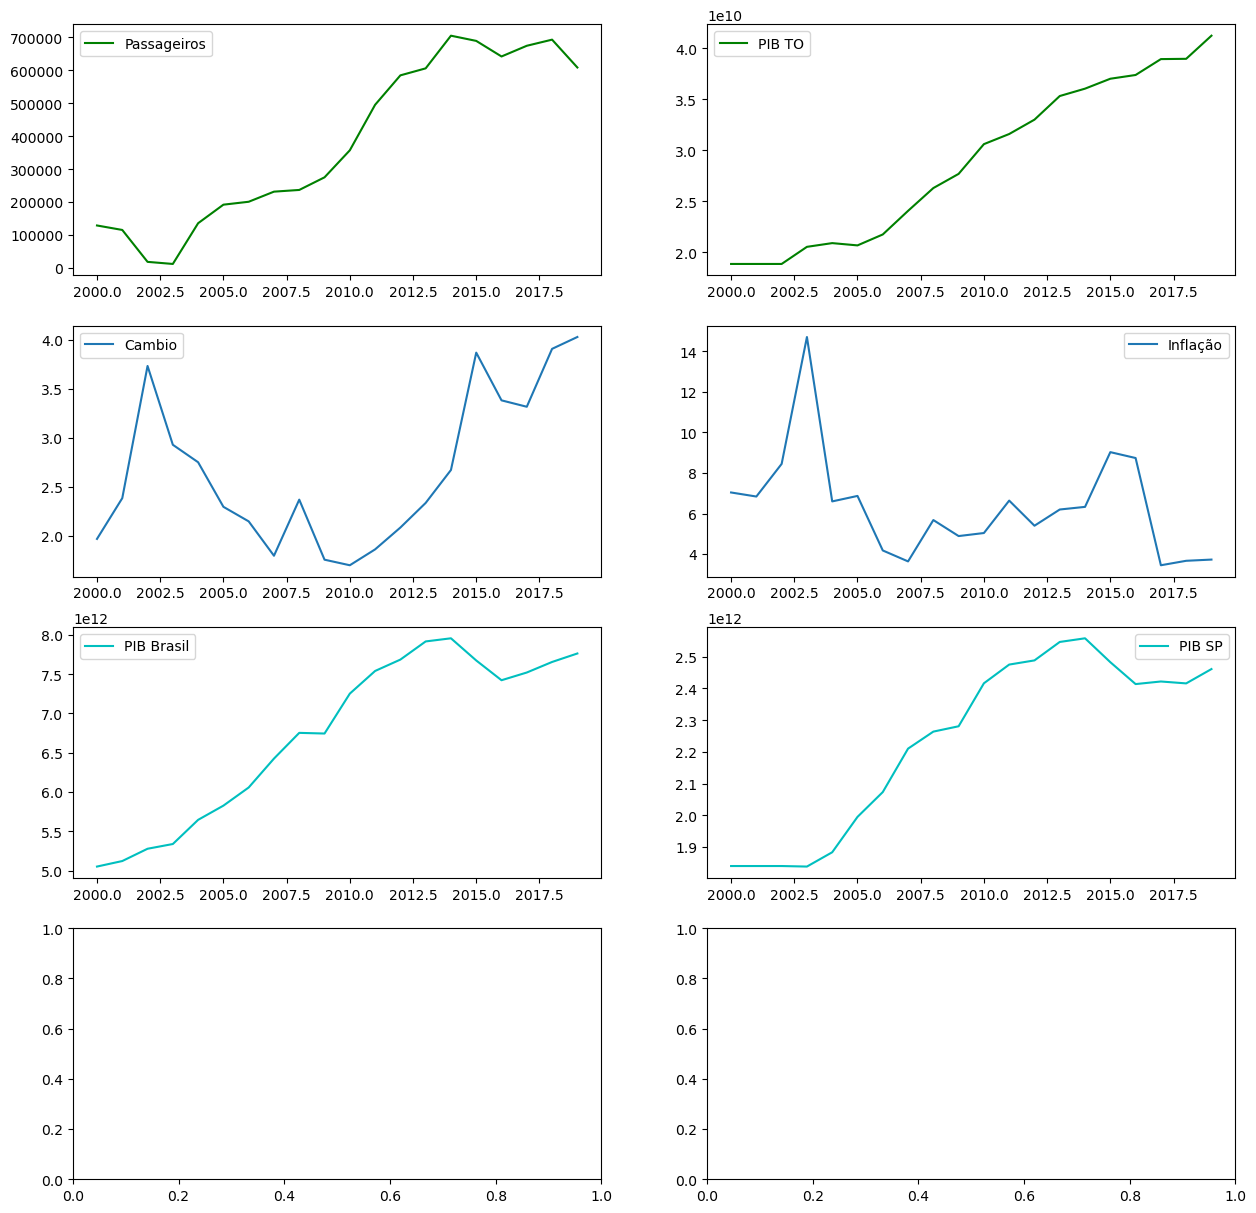

In [27]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
ax[2,1].legend()





plt.show()

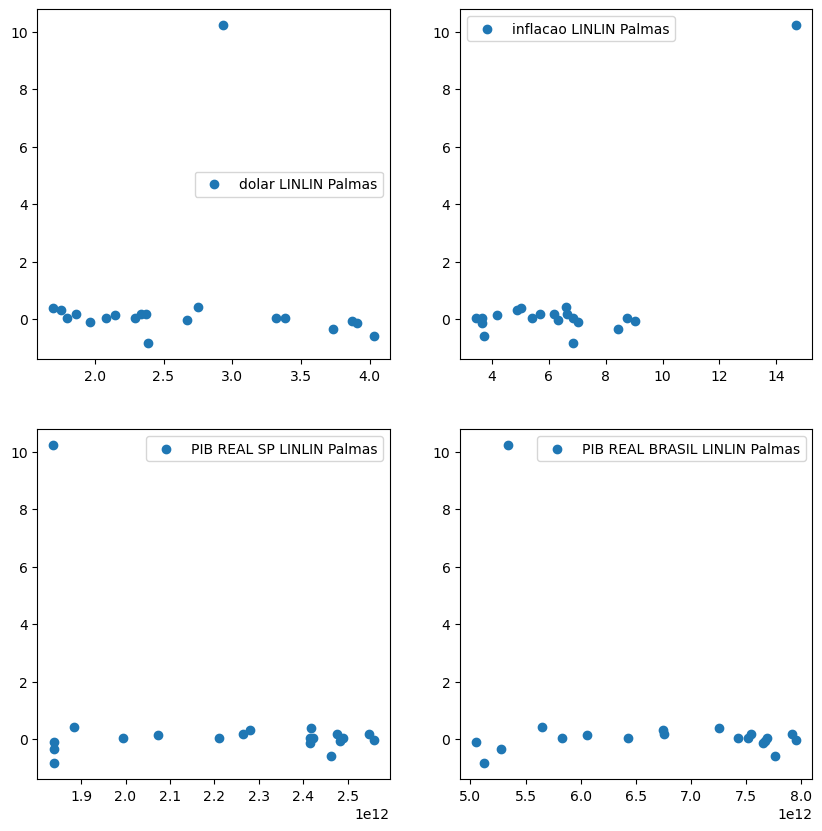

C:\Users\guido\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


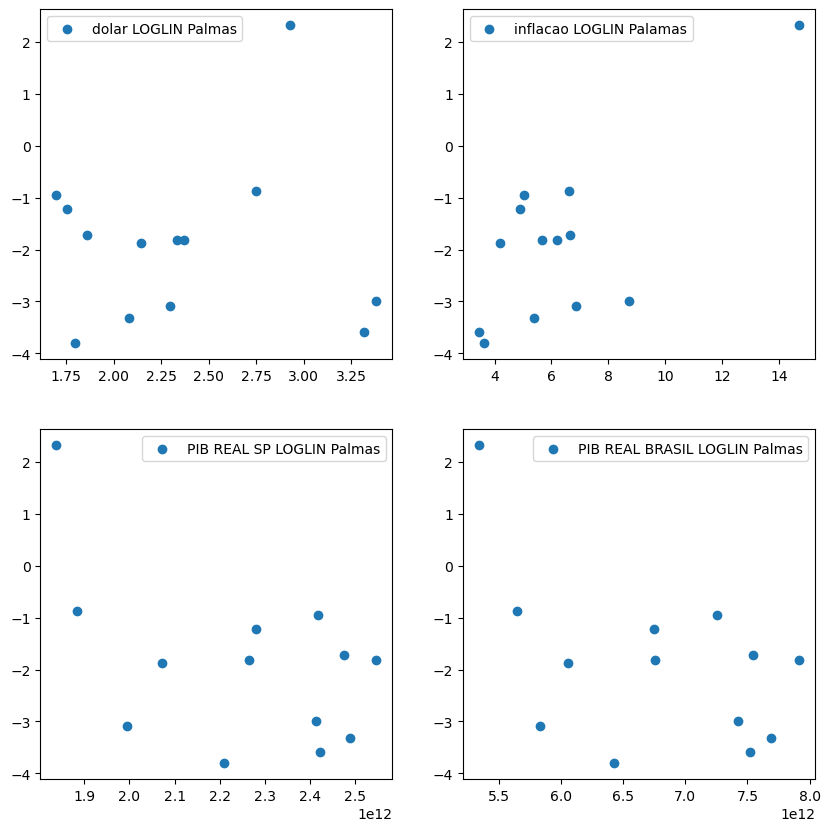

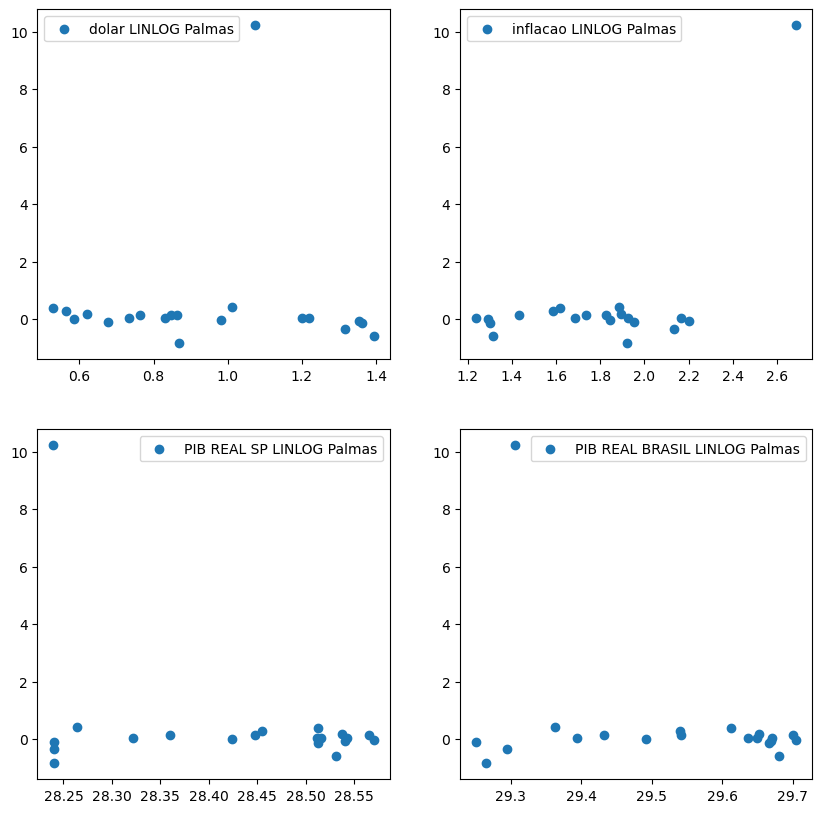

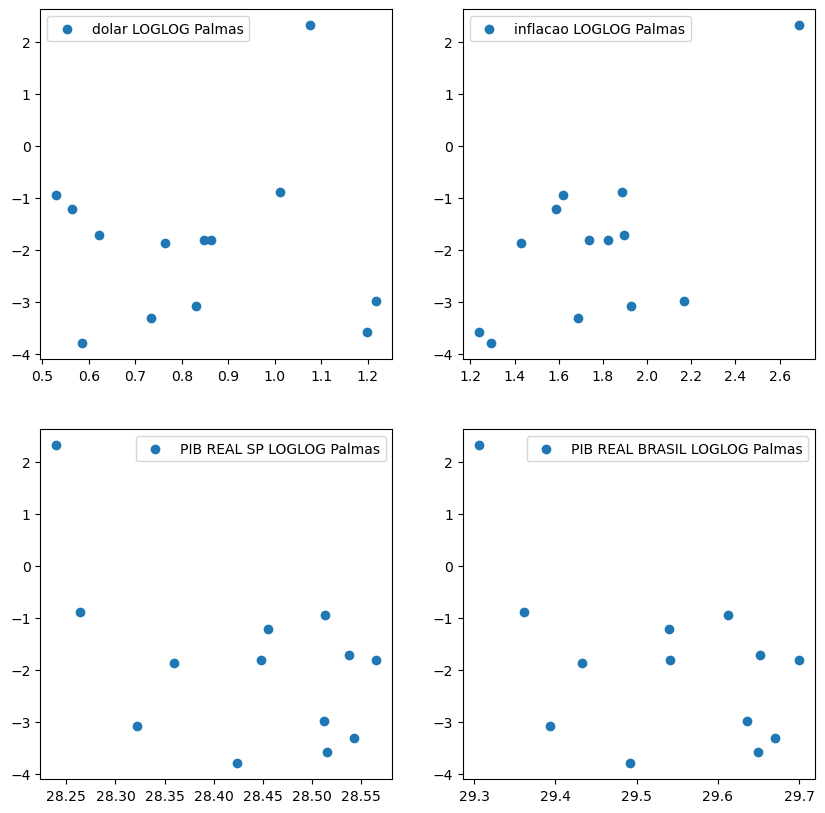

In [28]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros_freq"], label='dolar LINLIN Palmas')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros_freq"], label = 'inflacao LINLIN Palmas' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros_freq"], label = 'PIB REAL SP LINLIN Palmas' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros_freq"], label='PIB REAL BRASIL LINLIN Palmas')
ax[1,1].legend()

plt.show()
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros_freq"]), label='dolar LOGLIN Palmas')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLIN Palamas' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLIN Palmas' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLIN Palmas')
ax[1,1].legend()

plt.show()
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros_freq"], label='dolar LINLOG Palmas')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros_freq"], label = 'inflacao LINLOG Palmas' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros_freq"], label = 'PIB REAL SP LINLOG Palmas' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros_freq"], label='PIB REAL BRASIL LINLOG Palmas')
ax[1,1].legend()

plt.show()
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros_freq"]), label='dolar LOGLOG Palmas')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLOG Palmas' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLOG Palmas' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLOG Palmas')
ax[1,1].legend()

plt.show()

## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [29]:
principal =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [30]:
principal= principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL PR", "PIB REAL SC","PIB REAL TO"],axis=1).corr()

,Ano,Passageiros,Passageiros_freq,Oil,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL MA
Ano,1.000000,0.963178,-0.282992,0.498046,0.462911,-0.379601,0.934155,0.898730,0.971895
Passageiros,0.963178,1.000000,-0.387336,0.474653,0.495322,-0.325744,0.902445,0.861388,0.942201
Passageiros_freq,-0.282992,-0.387336,1.000000,-0.053982,-0.403037,0.244274,-0.167165,-0.145951,-0.199841
Oil,0.498046,0.474653,-0.053982,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.629463
dolar,0.462911,0.495322,-0.403037,-0.336762,1.000000,0.166638,0.202944,0.108461,0.327593
inflacao,-0.379601,-0.325744,0.244274,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.374915
PIB REAL BRASIL,0.934155,0.902445,-0.167165,0.739618,0.202944,-0.388362,1.000000,0.991895,0.976990
PIB REAL SP,0.898730,0.861388,-0.145951,0.768696,0.108461,-0.408767,0.991895,1.000000,0.955459
PIB REAL MA,0.971895,0.942201,-0.199841,0.629463,0.327593,-0.374915,0.976990,0.955459,1.000000


##### Análise grafica

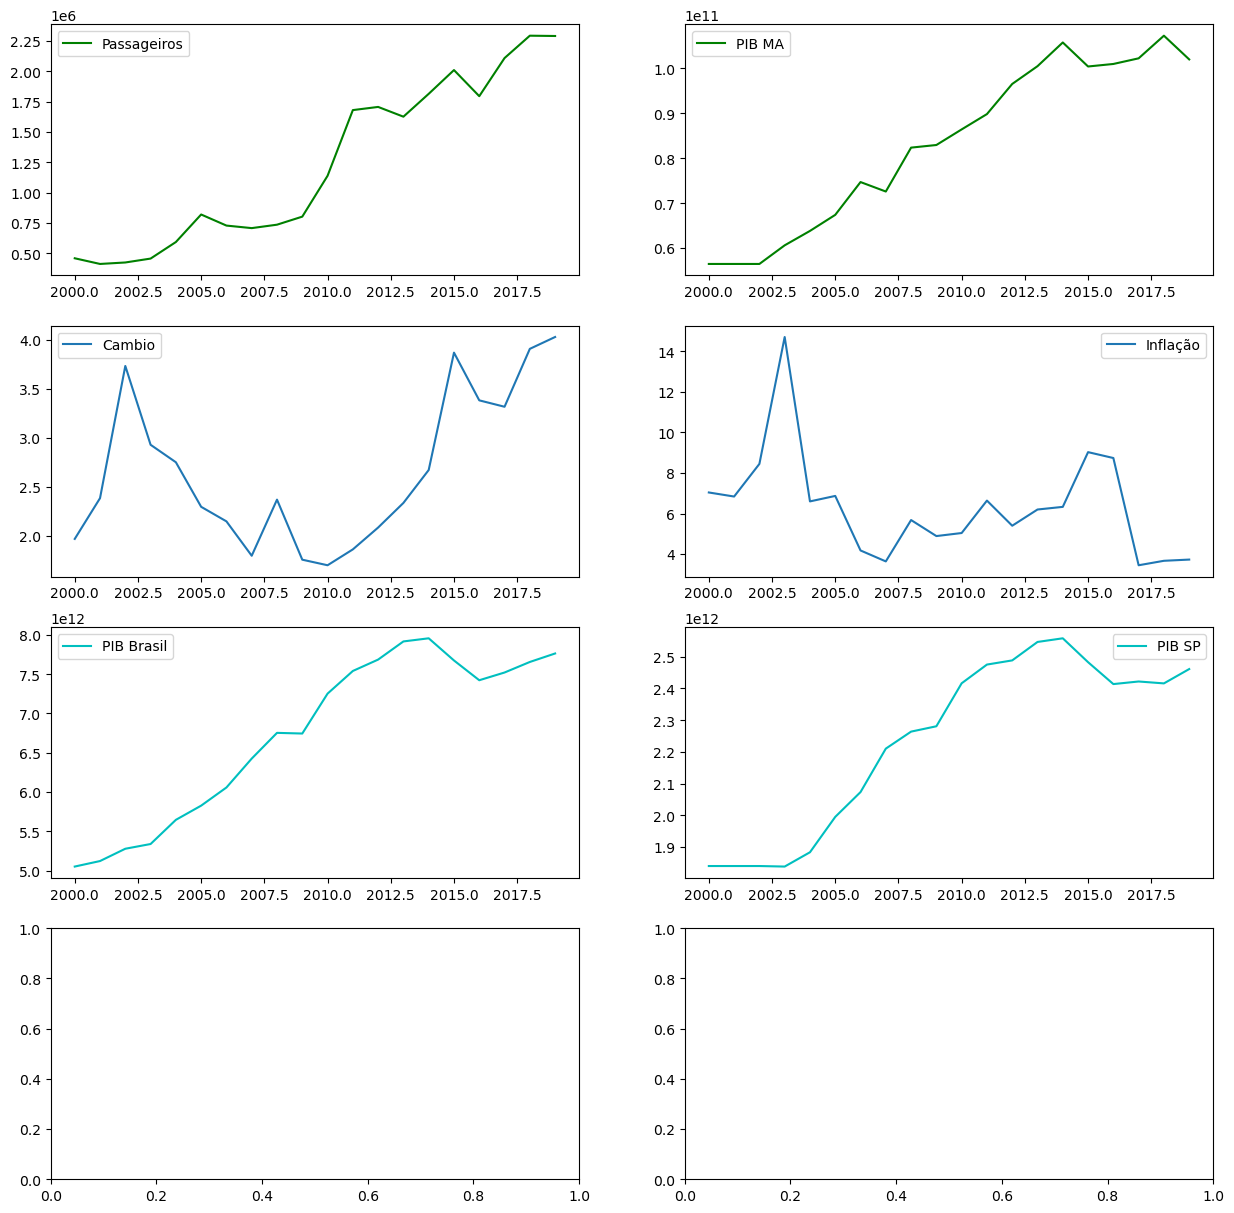

In [32]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["PIB REAL MA"],"g", label='PIB MA')
ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
ax[2,1].legend()




plt.show()

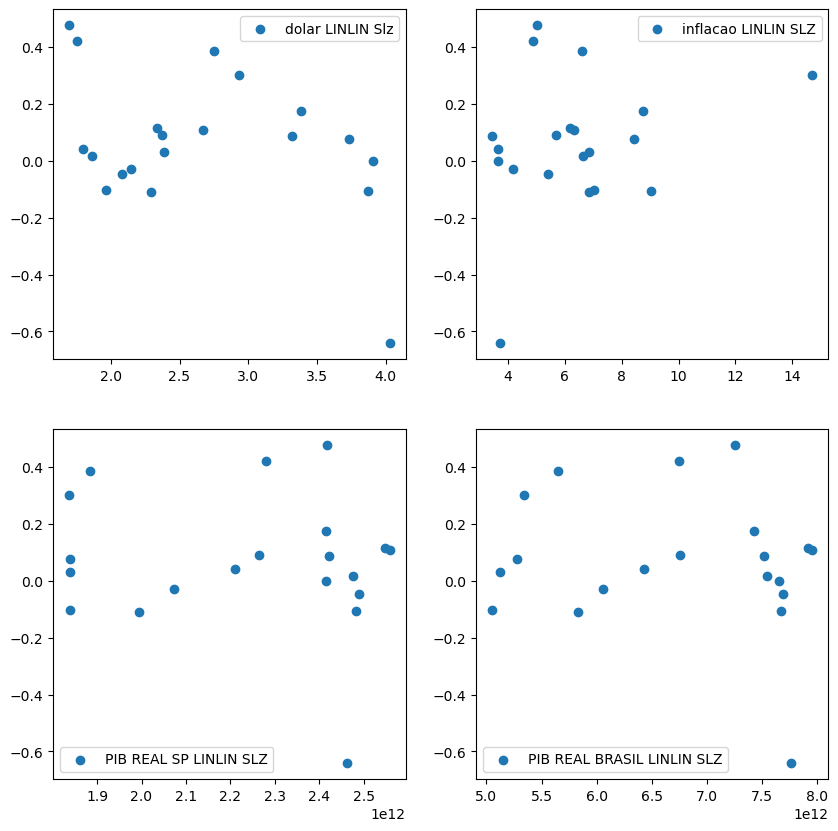

C:\Users\guido\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


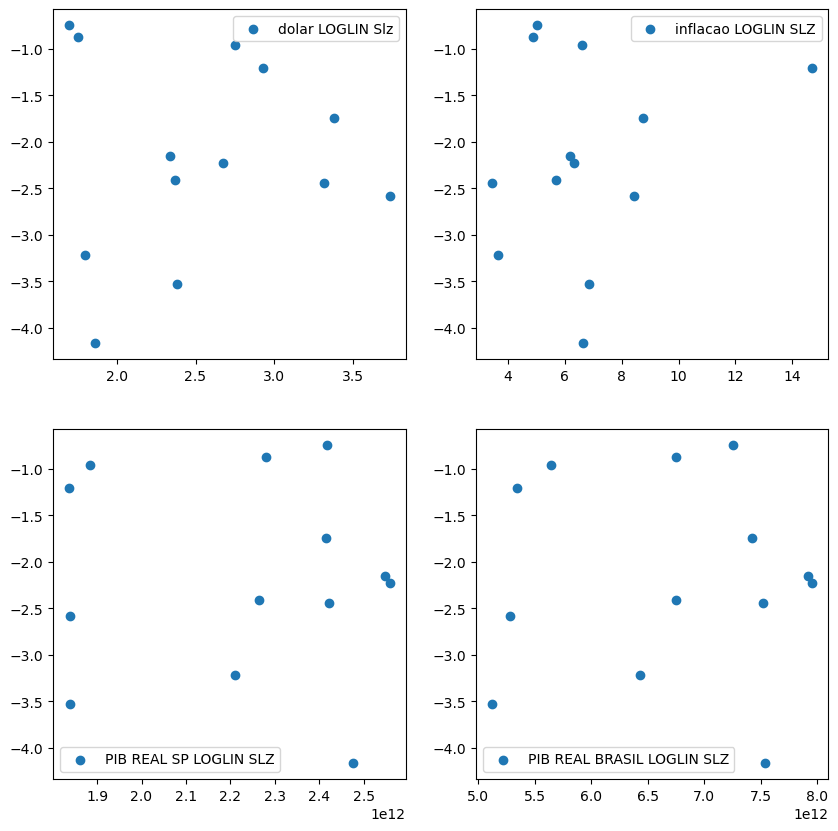

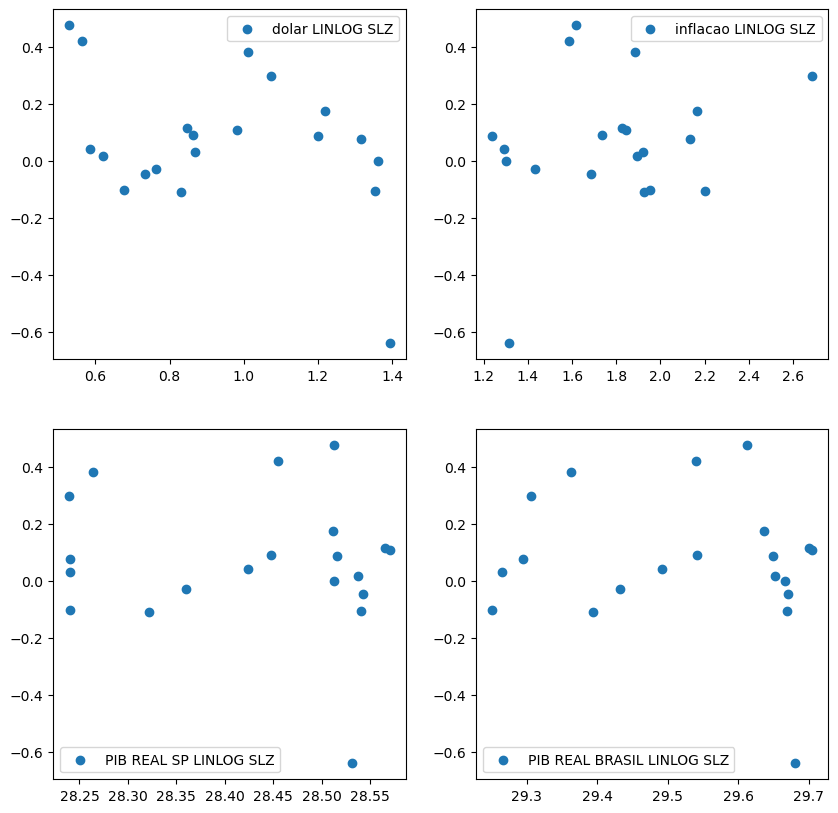

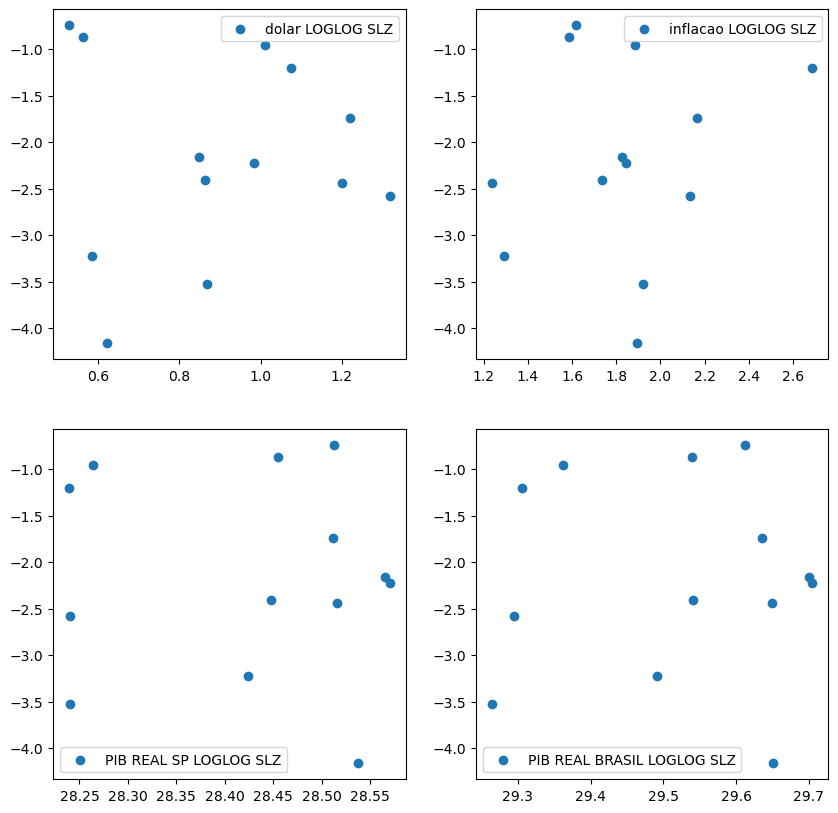

In [33]:
#LINLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], principal["Passageiros_freq"], label='dolar LINLIN Slz')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], principal["Passageiros_freq"], label = 'inflacao LINLIN SLZ' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], principal["Passageiros_freq"], label = 'PIB REAL SP LINLIN SLZ' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], principal["Passageiros_freq"], label='PIB REAL BRASIL LINLIN SLZ')
ax[1,1].legend()

plt.show()
#LOGLIN
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(principal["dolar"], np.log(principal["Passageiros_freq"]), label='dolar LOGLIN Slz')
ax[0,0].legend()

ax[0,1].scatter(principal["inflacao"], np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLIN SLZ' )
ax[0,1].legend()


ax[1,0].scatter(principal["PIB REAL SP"], np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLIN SLZ' )
ax[1,0].legend()

ax[1,1].scatter(principal["PIB REAL BRASIL"], np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLIN SLZ')
ax[1,1].legend()

plt.show()
#LINLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), principal["Passageiros_freq"], label='dolar LINLOG SLZ')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), principal["Passageiros_freq"], label = 'inflacao LINLOG SLZ' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), principal["Passageiros_freq"], label = 'PIB REAL SP LINLOG SLZ' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), principal["Passageiros_freq"], label='PIB REAL BRASIL LINLOG SLZ')
ax[1,1].legend()

plt.show()
#LOGLOG
fig, ax = plt.subplots(2,2)

fig.set_size_inches(10,10)



ax[0,0].scatter(np.log(principal["dolar"]), np.log(principal["Passageiros_freq"]), label='dolar LOGLOG SLZ')
ax[0,0].legend()

ax[0,1].scatter(np.log(principal["inflacao"]), np.log(principal["Passageiros_freq"]), label = 'inflacao LOGLOG SLZ' )
ax[0,1].legend()


ax[1,0].scatter(np.log(principal["PIB REAL SP"]), np.log(principal["Passageiros_freq"]), label = 'PIB REAL SP LOGLOG SLZ' )
ax[1,0].legend()

ax[1,1].scatter(np.log(principal["PIB REAL BRASIL"]), np.log(principal["Passageiros_freq"]), label='PIB REAL BRASIL LOGLOG SLZ')
ax[1,1].legend()

plt.show()

## Comparação de passageiros nos aeroportos analisados

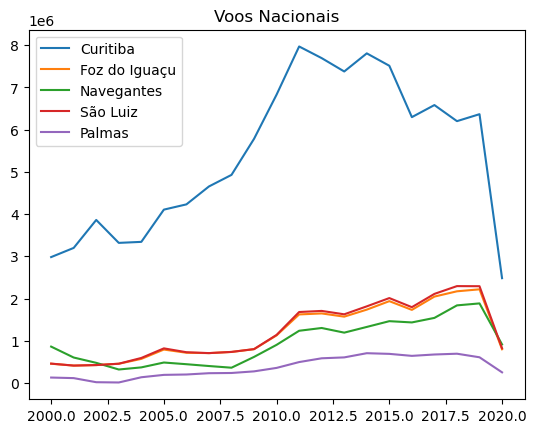

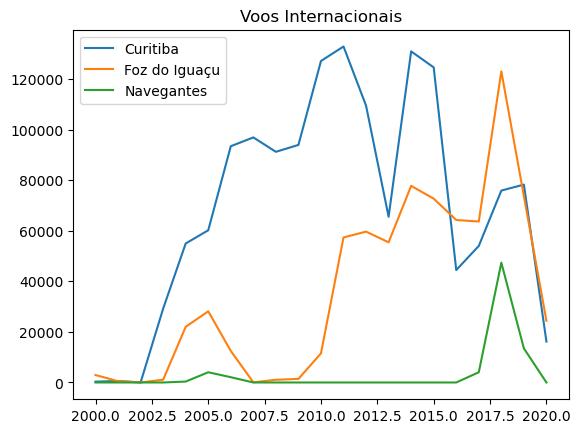

In [34]:
plt.plot(cwb_nac["Ano"], cwb_nac["Passageiros"], label='Curitiba')
plt.legend()

plt.plot(igu_nac["Ano"], igu_nac["Passageiros"], label='Foz do Iguaçu')
plt.legend()
#
plt.plot(nvt_nac["Ano"], nvt_nac["Passageiros"], label='Navegantes')
plt.legend()
#
plt.plot(slz["Ano"], slz["Passageiros"], label='São Luiz')
plt.legend()
#
plt.plot(pmw["Ano"], pmw["Passageiros"], label='Palmas')
plt.legend()

plt.title("Voos Nacionais")
plt.show()




plt.plot(cwb_nac["Ano"], cwb_int["Passageiros internacionais"], label='Curitiba')
plt.legend()

plt.plot(igu_nac["Ano"], igu_int["Passageiros internacionais"], label='Foz do Iguaçu')
plt.legend()

plt.plot(nvt_nac["Ano"], nvt_int["Passageiros internacionais"], label='Navegantes')
plt.legend()

plt.title("Voos Internacionais")
plt.show()